In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,LeakyReLU
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt


In [2]:
file_list = []
class_list = []




In [3]:
DATADIR = 'Documents/data1/train'
CATEGORIES = ['banana','cat','palm']

In [4]:
IMG_SIZE = 90

for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            
training_data = []

In [5]:
def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

In [6]:


random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)


In [7]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [8]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))
X = X/255.0



In [9]:
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(64))
model.add(LeakyReLU())

#model.add(Dense(64))
#model.add(LeakyReLU())

# The output layer with 13 neurons, for 13 classes
model.add(Dense(3))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 88, 88, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 88, 88, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 42, 42, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        3

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])


In [11]:
history = model.fit(X, y, batch_size=8, epochs=15, validation_split=0.2)

Train on 100 samples, validate on 26 samples
Epoch 1/15
100/100 [==============================] - 4s 44ms/sample - loss: 1.1417 - accuracy: 0.3000 - val_loss: 1.0180 - val_accuracy: 0.4615
Epoch 2/15
100/100 [==============================] - 2s 17ms/sample - loss: 1.0246 - accuracy: 0.4500 - val_loss: 0.8293 - val_accuracy: 0.5769
Epoch 3/15
100/100 [==============================] - 2s 17ms/sample - loss: 0.9257 - accuracy: 0.5500 - val_loss: 0.8071 - val_accuracy: 0.5385
Epoch 4/15
100/100 [==============================] - 2s 17ms/sample - loss: 0.8572 - accuracy: 0.6400 - val_loss: 0.9338 - val_accuracy: 0.5769
Epoch 5/15
100/100 [==============================] - 2s 16ms/sample - loss: 0.7089 - accuracy: 0.6900 - val_loss: 0.9358 - val_accuracy: 0.6923
Epoch 6/15
100/100 [==============================] - 2s 17ms/sample - loss: 0.6349 - accuracy: 0.7600 - val_loss: 0.8553 - val_accuracy: 0.6154
Epoch 7/15
100/100 [==============================] - 2s 16ms/sample - loss: 0.4803 -

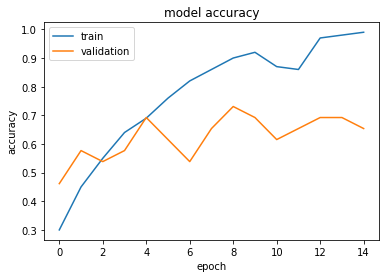

In [12]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [13]:


def prepare(path_to_img):
    
    
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.rgb_to_grayscale(img,name=None)
    img = tf.image.resize(img, [90,90])
    img = img[tf.newaxis, :]
    
    return img

In [26]:
image='Documents/data/pred/7.jpg'

image=prepare(image)
prediction = model.predict([image])
prediction = list(prediction[0])
print(prediction)
if(max(prediction)<0.50):
    print('others')
else:
print(CATEGORIES[prediction.index(max(prediction))])


[7.455719e-09, 0.0014881379, 0.99851185]
palm
